In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('/content/voice.csv')

In [85]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


##Remove/handle null values (if any)

In [86]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [87]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


##Depict percentage distribution of label on a pie chart

In [88]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

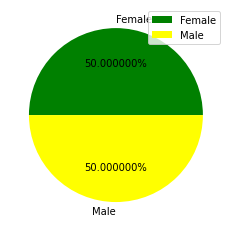

In [89]:
plt.pie(df['label'].value_counts(),colors=['green','yellow'],labels=['Female','Male'],autopct='%3f%%')
plt.legend()
plt.show()

##Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%

In [90]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [91]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [92]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [95]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1059,0.192408,0.055248,0.210461,0.133092,0.236250,0.103158,1.377064,4.495481,0.909032,0.348257,0.230724,0.192408,0.123986,0.047059,0.275862,1.406250,0.023438,7.875000,7.851562,0.111685
448,0.194781,0.057615,0.207011,0.141573,0.242876,0.101303,1.215027,4.165964,0.913199,0.381898,0.139056,0.194781,0.112783,0.020539,0.152381,0.430339,0.226562,0.796875,0.570312,0.367372
542,0.140373,0.091465,0.151220,0.081603,0.216248,0.134645,25.693289,711.134310,0.842626,0.466323,0.000000,0.140373,0.064367,0.015779,0.160000,0.007812,0.007812,0.007812,0.000000,0.000000
2523,0.211460,0.031389,0.212108,0.199458,0.226446,0.026988,2.912365,12.286024,0.835035,0.181913,0.212108,0.211460,0.188752,0.047478,0.279070,1.069149,0.023438,6.820312,6.796875,0.098075
58,0.135650,0.086412,0.126722,0.049986,0.228842,0.178856,1.388276,5.009017,0.952514,0.659814,0.114812,0.135650,0.134314,0.060837,0.250000,1.108750,0.007812,4.296875,4.289062,0.369266


In [96]:
y_test.head()

2515    female
1838    female
414       male
1735    female
1261      male
Name: label, dtype: object

##Apply Support Vector Classifier on train data with different kernels and generate predictions on test data

In [97]:
from sklearn.svm import SVC

In [98]:
df2 = df.copy()

In [99]:
svc = SVC()

In [100]:
kernels = {'linearkernels':'linear','polykernels':'poly','rbfkernals':'rbf'}
for i in kernels.keys():
  svc = SVC(kernel=kernels[i])
  print(i)
  print(svc.fit(x_train,y_train))
  df2[i] = svc.predict(x)
  exec(f'y_pred{i}=svc.predict(x_test)')
  # print(f'y_pred{i}')

linearkernels
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
polykernels
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
rbfkernals
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


###y_predlinearkernels
###y_predpolykernels
###y_predrbfkernels
different kernels y_prediction on x_test_data

In [101]:
y_predrbfkernals

array(['female', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'male', 'female',
       'female', 'male', 'female', 'female', 'female', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'female', 'female', 'female', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'female',
       'male', 'fe

Also generate confusion_matrix and classification report for each of them

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print('linear')
print(confusion_matrix(y_test,y_predlinearkernels))
print('poly')
print(confusion_matrix(y_test,y_predpolykernels))
print('rbf')
print(confusion_matrix(y_test,y_predrbfkernals))

linear
[[260  51]
 [  9 314]]
poly
[[308   3]
 [310  13]]
rbf
[[167 144]
 [ 62 261]]


In [104]:
print(classification_report(y_test,y_predlinearkernels))
print(classification_report(y_test,y_predpolykernels))
print(classification_report(y_test,y_predrbfkernals))

              precision    recall  f1-score   support

      female       0.97      0.84      0.90       311
        male       0.86      0.97      0.91       323

    accuracy                           0.91       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.91      0.90       634

              precision    recall  f1-score   support

      female       0.50      0.99      0.66       311
        male       0.81      0.04      0.08       323

    accuracy                           0.51       634
   macro avg       0.66      0.52      0.37       634
weighted avg       0.66      0.51      0.36       634

              precision    recall  f1-score   support

      female       0.73      0.54      0.62       311
        male       0.64      0.81      0.72       323

    accuracy                           0.68       634
   macro avg       0.69      0.67      0.67       634
weighted avg       0.69      0.68      0.67       634



##Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy for linear, rbf and poly kernels separately

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
for i in kernels.keys():
  score = cross_val_score(SVC(kernel=kernels[i]),x,y,cv=10)
  print('model accuracy : ',score)
  print(f'At kernels: {i}, accuracy mean is {score.mean()}')
  print(' ')


model accuracy :  [0.72239748 0.94321767 0.84542587 0.96214511 0.94006309 0.99684543
 0.97791798 0.96845426 0.9335443  0.90189873]
At kernels: linearkernels, accuracy mean is 0.9191909914946292
 
model accuracy :  [0.58044164 0.53943218 0.45425868 0.5615142  0.50157729 0.50157729
 0.50157729 0.50157729 0.48417722 0.50316456]
At kernels: polykernels, accuracy mean is 0.5129297608114044
 
model accuracy :  [0.51104101 0.5488959  0.63722397 0.69716088 0.73501577 0.76971609
 0.75394322 0.67192429 0.61075949 0.65189873]
At kernels: rbfkernals, accuracy mean is 0.658757936349479
 


Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart

In [107]:
C = [w for w in range(1,13)]

model accuracy :  [0.80934343 0.93181818 0.97348485 0.93560606]
At C value: 1, accuracy mean is 0.9125631313131313
 
model accuracy :  [0.81691919 0.95959596 0.97727273 0.97348485]
At C value: 2, accuracy mean is 0.9318181818181819
 
model accuracy :  [0.83964646 0.96590909 0.97727273 0.97979798]
At C value: 3, accuracy mean is 0.9406565656565656
 
model accuracy :  [0.87878788 0.96590909 0.97853535 0.97979798]
At C value: 4, accuracy mean is 0.9507575757575757
 
model accuracy :  [0.90151515 0.96717172 0.98106061 0.98106061]
At C value: 5, accuracy mean is 0.9577020202020201
 
model accuracy :  [0.90782828 0.96590909 0.97853535 0.97979798]
At C value: 6, accuracy mean is 0.9580176767676767
 
model accuracy :  [0.91035354 0.96590909 0.97853535 0.98232323]
At C value: 7, accuracy mean is 0.959280303030303
 
model accuracy :  [0.91540404 0.96717172 0.97727273 0.97979798]
At C value: 8, accuracy mean is 0.9599116161616161
 
model accuracy :  [0.91666667 0.96590909 0.97727273 0.98106061]
A

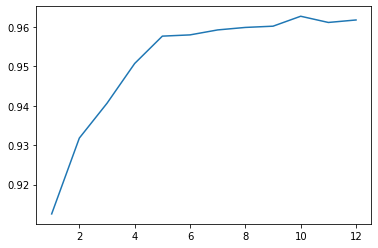

In [108]:
Cs = []
for i in C:
  score = cross_val_score(SVC(C=i,kernel='linear'),x,y,cv=4)
  print('model accuracy : ',score)
  print(f'At C value: {i}, accuracy mean is {score.mean()}')
  Cs.append(score.mean())
  print(' ')
plt.plot(C,Cs)
plt.show()

##Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart

model accuracy :  [0.55176768 0.66035354 0.7020202  0.65025253]
At C value: 1, accuracy mean is rbf kernel 0.6410984848484849
 
model accuracy :  [0.56565657 0.68434343 0.6969697  0.65909091]
At C value: 2, accuracy mean is rbf kernel 0.6515151515151515
 
model accuracy :  [0.56691919 0.68055556 0.69318182 0.66540404]
At C value: 3, accuracy mean is rbf kernel 0.6515151515151516
 
model accuracy :  [0.56439394 0.68813131 0.69949495 0.66414141]
At C value: 4, accuracy mean is rbf kernel 0.654040404040404
 
model accuracy :  [0.56565657 0.68813131 0.70328283 0.66792929]
At C value: 5, accuracy mean is rbf kernel 0.65625
 
model accuracy :  [0.56313131 0.68181818 0.70328283 0.6729798 ]
At C value: 6, accuracy mean is rbf kernel 0.6553030303030303
 
model accuracy :  [0.56439394 0.68560606 0.70328283 0.67424242]
At C value: 7, accuracy mean is rbf kernel 0.6568813131313131
 
model accuracy :  [0.56186869 0.68686869 0.70580808 0.67676768]
At C value: 8, accuracy mean is rbf kernel 0.6578282

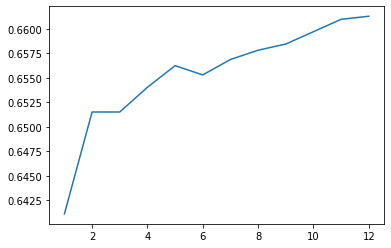

In [111]:
Cs1=[]
for i in C:
  score = cross_val_score(SVC(C=i,kernel='rbf'),x,y,cv=4)
  print('model accuracy : ',score)
  print(f'At C value: {i}, accuracy mean is rbf kernel {score.mean()}')
  Cs1.append(score.mean())
  print(' ')

plt.plot(C,Cs1)
plt.show()

##Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart
####a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
####b) gamma_range = [0.01,0.02,0.03,0.04,0.05]

In [112]:
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
gamma_range1 = [0.01,0.02,0.03,0.04,0.05]

In [114]:
gamma_range

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

model accuracy :  [0.55681818 0.6729798  0.71212121 0.6729798 ]
At gamma value: 0.0001, accuracy mean is 65.37247474747474
 
model accuracy :  [0.56691919 0.66414141 0.71590909 0.65151515]
At gamma value: 0.001, accuracy mean is 64.9621212121212
 
model accuracy :  [0.57954545 0.69191919 0.73106061 0.66414141]
At gamma value: 0.01, accuracy mean is 66.66666666666667
 
model accuracy :  [0.55681818 0.72727273 0.73611111 0.66666667]
At gamma value: 0.1, accuracy mean is 67.17171717171718
 
model accuracy :  [0.55934343 0.77146465 0.74621212 0.66287879]
At gamma value: 1, accuracy mean is 68.49747474747474
 
model accuracy :  [0.57070707 0.70833333 0.71338384 0.71969697]
At gamma value: 10, accuracy mean is 67.8030303030303
 
model accuracy :  [0.51641414 0.51893939 0.53409091 0.49873737]
At gamma value: 100, accuracy mean is 51.70454545454546
 


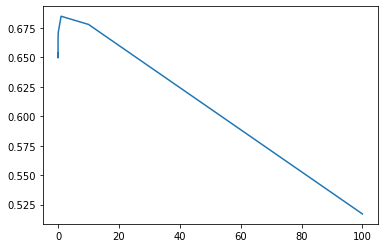

In [115]:
gs = []
for i in gamma_range:
  score = cross_val_score(SVC(kernel='rbf',gamma=i),x,y,cv=4)
  print('model accuracy : ',score)
  print(f'At gamma value: {i}, accuracy mean is {score.mean()*100}')
  gs.append(score.mean())
  print(' ')

plt.plot(gamma_range,gs)
plt.show()

model accuracy :  [0.57954545 0.69191919 0.73106061 0.66414141]
At gamma value: 0.01, accuracy mean is 66.66666666666667
 
model accuracy :  [0.59848485 0.70454545 0.73737374 0.66414141]
At gamma value: 0.02, accuracy mean is 67.61363636363637
 
model accuracy :  [0.60606061 0.71464646 0.74242424 0.66919192]
At gamma value: 0.03, accuracy mean is 68.3080808080808
 
model accuracy :  [0.61111111 0.70959596 0.74242424 0.67171717]
At gamma value: 0.04, accuracy mean is 68.37121212121212
 
model accuracy :  [0.60858586 0.70454545 0.73863636 0.66792929]
At gamma value: 0.05, accuracy mean is 67.99242424242425
 


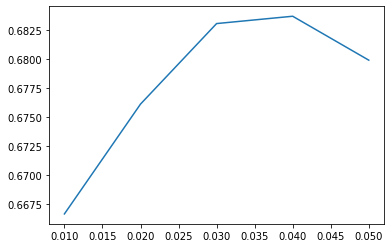

In [116]:
gs1 = []
for i in gamma_range1:
  score = cross_val_score(SVC(kernel='rbf',gamma=i),x,y,cv=4)
  print('model accuracy : ',score)
  print(f'At gamma value: {i}, accuracy mean is {score.mean()*100}')
  gs1.append(score.mean())
  print(' ')

plt.plot(gamma_range1,gs1)
plt.show()

###Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart

In [126]:
degree = [d for d in range(1,6)]

model accuracy :  [0.56313131 0.52020202 0.5        0.45454545]
At degree: 1, accuracy mean is 0.509469696969697
 
model accuracy :  [0.55176768 0.52020202 0.5        0.49621212]
At degree: 2, accuracy mean is 0.5170454545454546
 
model accuracy :  [0.53914141 0.52020202 0.5        0.49494949]
At degree: 3, accuracy mean is 0.5135732323232323
 
model accuracy :  [0.56313131 0.52146465 0.5        0.5       ]
At degree: 4, accuracy mean is 0.52114898989899
 
model accuracy :  [0.56691919 0.5239899  0.5        0.50252525]
At degree: 5, accuracy mean is 0.5233585858585859
 


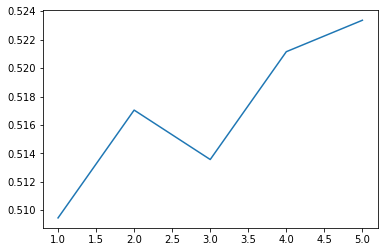

In [127]:
d1 = []
for i in degree:
  score = cross_val_score(SVC(kernel='poly',degree=i),x,y,cv=4)
  print('model accuracy : ',score)
  print(f'At degree: {i}, accuracy mean is {score.mean()}')
  d1.append(score.mean())
  print(' ')

plt.plot(degree,d1)
plt.show()

#..........................................END...............................